# An Introduction to Scientific Python with $\pi$

In this example we will use various Python features to calculate $\pi$ by the Monte Carlo method, of the ratio of points inside and outside of a circle. We will go over a few ways of doing this to introduce you to various Python concepts. If we have time, we will also use matplotlib, the Python plotting library to create an animation of the process.

## The method

The method is simple:

In [1]:
import numpy as np

In [2]:
# Set up counters
total = 0
inside = 0

for i in range(10000):
    
    # Generate two coordinates in the interval 0-1:
    x_coord = np.random.random(1)
    y_coord = np.random.random(1)
    
    # Calculate the distance to the origin
    r = np.sqrt(x_coord**2 + y_coord**2)

    # Count this if it is inside the circle.
    if r< 1:
        inside += 1

    total += 1

In [3]:
print((inside/total)*4.)

3.1392


## Calculating $\pi$ using a function

<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil" style="padding-right:10px"></span>Functions are Fun</h2>
</div>
<div class="panel-body">
<p>Now refactor the inner part of the loop as a function, then call the function in a for loop to calculate $\pi$. (This will become useful shortly).</p>
</div>
</section>

In [4]:
import numpy as np

To keep the total count and inside count variables availible we pass them into the function and return the modified ones from the function.

In [5]:
def pitest():
    # Create the coordinate
    xtemp = np.random.random(1)
    ytemp = np.random.random(1)
    
    # Calculate the distance to the origin
    r = np.sqrt(xtemp**2 + ytemp**2)

    # Count this if it is inside the circle.
    if r< 1:
        return True
  
    return False

To execute this we run the function multiple times. *Note: we do not need to calculate the total count like this for this case, we could just know the number of times the loop runs, but the way it is done is useful for animation later.*

In [6]:
count = 0
inside = 0

for i in range(10000):
    is_inside = pitest()
    
    inside += is_inside
    count += 1
    
print((inside/count)*4.)

3.1432


### A note on speed

As already mentioned, in isolation this method is not optimal. As demonstrated below it takes quite a long time to calculate $\pi$.

In [7]:
%%timeit

count = 0.
inside = 0.

for i in range(10000):
    is_inside = pitest()
    
    inside += is_inside
    count += 1
    
print((inside/count)*4.)

3.1396
3.1588
3.1432
3.1428
1 loop, best of 3: 483 ms per loop


Generally in scientific Python applications you do not need to iterate like this you can infact calculate $\pi$ by the monte carlo method, using nothing but NumPy arrays:

In [8]:
points = np.random.random([2,1000000])
inside = np.count_nonzero(np.sqrt(points[0,:]**2 + points[1,:]**2) < 1)
pi = (float(inside)/points.shape[1])*4
pi

3.143036

In [9]:
%%timeit
points = np.random.random([2,1000000])
inside = np.count_nonzero(np.sqrt(points[0,:]**2 + points[1,:]**2) < 1)
pi = (float(inside)/points.shape[1])*4

10 loops, best of 3: 95.6 ms per loop


As can be seen, it is substantially faster to calculate $\pi$ using NumPy arrays.

# Plotting at Light-Speed

This is the worlds fastest introduction to matplotlib, a very powerful plotting library.

In [19]:
# import
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f2db3d48c50>

In [20]:
# notebook wizardry (you don't need this in a script):
%matplotlib notebook

<IPython.core.display.Javascript object>


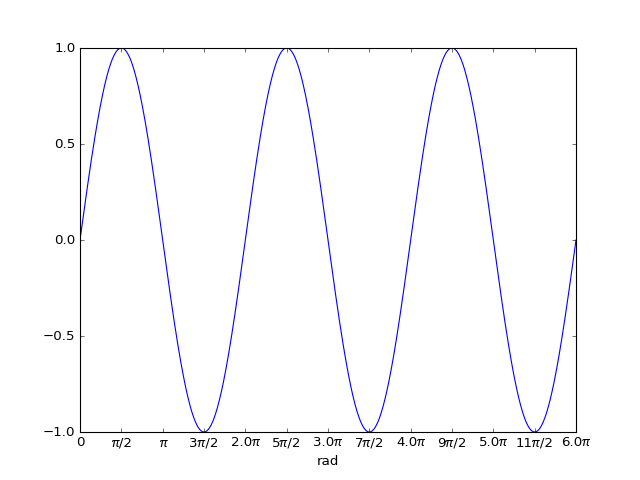

In [21]:
# A plot:
x = np.linspace(0, np.pi*6, 1000) * u.rad
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

plt.show()

<IPython.core.display.Javascript object>


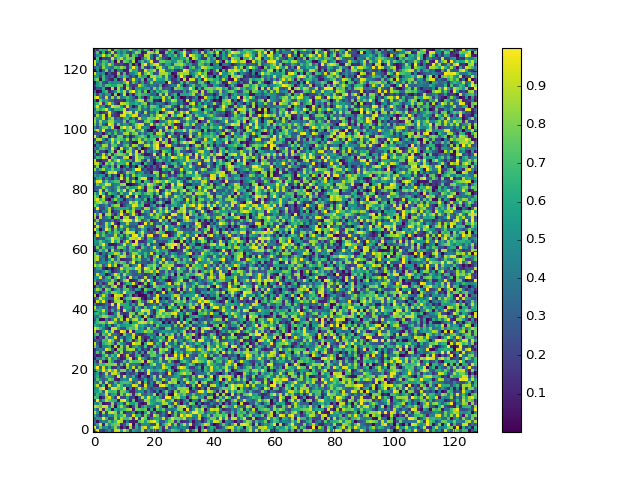

In [22]:
# An image:
image = np.random.random((128, 128))

fig, ax = plt.subplots()

im = ax.imshow(image, cmap='viridis', origin='lower', interpolation='none')
plt.colorbar(im)

plt.show()

## Animation:

In [23]:
import matplotlib.animation as anim

In [33]:
def animate(i):
    line.set_ydata(np.sin(x+i/20.0)) # update the data
    return line,

<IPython.core.display.Javascript object>


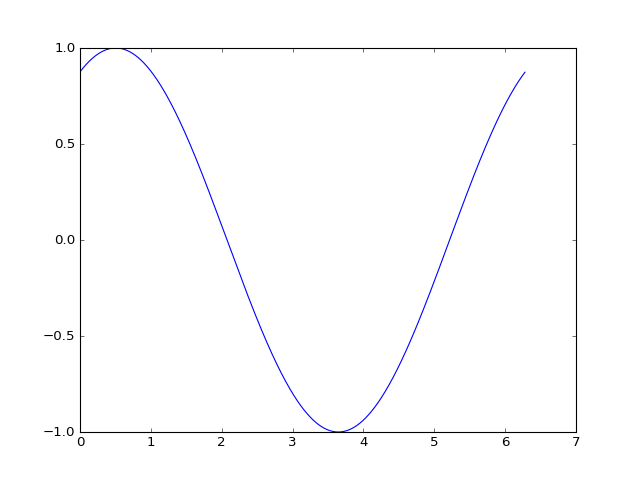

In [34]:
fig, ax = plt.subplots()

x = np.arange(0,2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

ani = anim.FuncAnimation(fig, animate, np.arange(1,200), interval=25)

# ani.save('myanimation.mp4')

plt.show()

<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil" style="padding-right:10px"></span>Animate pi!</h2>
</div>
<div class="panel-body">
<p>
Use the function you wrote earlier and your new found plotting skills to animate pi!
</p>
</div>
</section>

The second part of the challenge was to animate the estimator, to do this we modify our function a little:

This version of the function uses the `global` statement to keep the modified counters availible, this is because it is not possible to capture any returned values from a `matplotlib` animation function.

This time we also add some plotting commands, but otherwise the function remains the same.

In [22]:
count = [0.]
inside = [0.]
def pitest(i, ax, count, inside):
    xtemp = np.random.random(1)
    ytemp = np.random.random(1)
       
    r = np.sqrt(xtemp**2 + ytemp**2)

    if r< 1:
        inside[0] += 1
        point, = ax.plot(xtemp, ytemp, 'ob')
    else:
        point, = ax.plot(xtemp, ytemp, 'or')

    count[0] += 1
    
    ax.set_title(r"Current Estimation of $\pi$ is {:3.10f}".format((inside[0]/count[0])*4.))

Now we setup the plot, add a line showing the unit circle, and animate the function above:

<IPython.core.display.Javascript object>


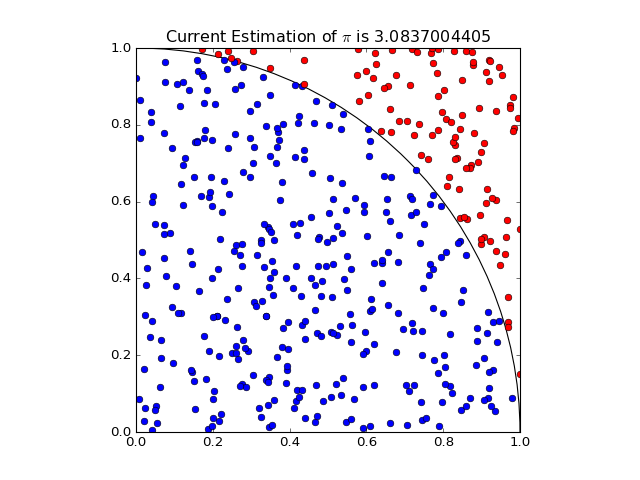

In [23]:
fig, ax = plt.subplots()

# Plot the R = 1 line
circ = plt.Circle((0,0), radius=1, facecolor='none')
ax.add_artist(circ)

point, = ax.plot(0,0)
ani = anim.FuncAnimation(fig, pitest, fargs=(ax, count, inside), interval=5)


ax.axis('image')
ax.axis([0,1,0,1])
plt.show()